# Program - plot XY time series in nudge AM4, MERRA-2 and CERES for TOA radiative fluxes

**Content:**

- Open AM4, MERRA-2, and CEREC netCDF files
- Read TOA radiative fluxes (note that variable names differ in these dataset)
- Plot XY time series

**Author**: Yi-Hsuan Chen (yihsuan@umich.edu)

In [129]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np
import xarray as xr
import io, os, sys, types
import yhc_module as yhc

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

## Open AM4 files

In [4]:
#--- open SCM file
datapath = "../data.am4_regress.nudge2000/"

#--- single file
#filename_scm = ""
#file_scm = datapath+"/"+filename_scm

#--- multiple files
filenames_am4 = [
    "cm4p12_xanadu_am4p0_edmf_mynn.tt1-c96L33_am4p0_cm4amip_nudge2000_Jul2001.1x0m30d_432x2a.atmos_hourly.lat_lon.nc.20010710.nc", 
    "cm4p12_xanadu_am4p0_edmf_mynn.tt1-c96L33_am4p0_cm4amip_nudge2000_Jul2001.1x0m30d_432x2a.atmos_hourly.lat_lon.nc.20010711.nc",
                ]
filenames_am4 = [datapath+file1 for file1 in filenames_am4]

#--- open data using xarray
da_am4 = xr.open_mfdataset(filenames_am4)

da_am4


<xarray.Dataset>
Dimensions:       (time: 48, lat: 180, lon: 288, bnds: 2)
Coordinates:
  * lat           (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon           (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time          (time) object 2001-07-10 00:30:00 ... 2001-07-11 23:30:00
Dimensions without coordinates: bnds
Data variables: (12/21)
    IWP           (time, lat, lon) float32 dask.array<chunksize=(24, 180, 288), meta=np.ndarray>
    LWP           (time, lat, lon) float32 dask.array<chunksize=(24, 180, 288), meta=np.ndarray>
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(24,), meta=np.ndarray>
    average_T1    (time) datetime64[ns] dask.array<chunksize=(24,), meta=np.ndarray>
    average_T2    (time) datetime64[ns] dask.array<chunksize=(24,), meta=np.ndarray>
    evap          (time, lat, lon) float32 dask.array<chunksize=(24, 180, 288), meta=np.ndarray>
    ...            ...
    swcre_toa     (time, lat, lon) float32 dask.array<chunksize=(24, 180, 288), meta=np.ndarray>
    swdn_toa      (time, lat, lon) float32 dask.array<chunksize=(24, 180, 288), meta=np.ndarray>
    swup_toa      (time, lat, lon) float32 dask.array<chunksize=(24, 180, 288), meta=np.ndarray>
    swup_toa_clr  (time, lat, lon) float32 dask.array<chunksize=(24, 180, 288), meta=np.ndarray>
    time_bnds     (time, bnds) object dask.array<chunksize=(24, 2), meta=np.ndarray>
    z_pbl         (time, lat, lon) float32 dask.array<chunksize=(24, 180, 288), meta=np.ndarray>
Attributes:
    filename:              20010701.atmos_hourly.tile1.nc
    title:                 tt1-c96L33_am4p0_cm4amip_nudge2000_Jul2001
    associated_files:      area: 20010701.grid_spec.nc
    grid_type:             regular
    grid_tile:             N/A
    code_release_version:  19.1
    git_hash:              c97c1f6afab0df3545ee82c337d51accc4205bc3
    creationtime:          Tue Jun 21 13:39:02 2022
    hostname:              an011
    history:               Tue Jun 21 23:09:05 2022: ncks -F -d time,217,240 ...
    NCO:                   "4.5.4"

## Open MERRA-2 files

In [10]:
#--- open SCM file
datapath = "../data.MERRA-2.tavg1_2d_rad_Nx.200107/"

#--- single file
#filename_scm = ""
#file_scm = datapath+"/"+filename_scm

#--- multiple files
filenames_merra2 = [
    "MERRA2_300.tavg1_2d_rad_Nx.20010710.nc4.nc4", 
    "MERRA2_300.tavg1_2d_rad_Nx.20010711.nc4.nc4", 
                ]
filenames_merra2 = [datapath+file1 for file1 in filenames_merra2]

#--- open data using xarray
da_merra2 = xr.open_mfdataset(filenames_merra2)
da_merra2 = yhc.wrap360(da_merra2)  # change lon from -180~180 to 0-360
#da_merra2

<xarray.Dataset>
Dimensions:  (lon: 576, time: 48, lat: 361)
Coordinates:
  * lon      (lon) float64 0.625 1.25 1.875 2.5 ... 358.1 358.8 359.4 360.0
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2001-07-10T00:30:00 ... 2001-07-11T23:30:00
Data variables:
    SWTDN    (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    CLDHGH   (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    CLDLOW   (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    CLDMID   (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    SWTNT    (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    LWTUP    (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
Attributes: (12/32)
    History:                           Original file generated: Sat Jun 14 01...
    Comment:                           GMAO filename: d5124_m2_jan00.tavg1_2d...
    Filename:                          MERRA2_300.tavg1_2d_rad_Nx.20010710.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    RangeBeginningDate:                2001-07-10
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2001-07-10
    RangeEndingTime:                   23:59:59.000000
    DODS_EXTRA.Unlimited_Dimension:    time
    history:                           2022-05-02 15:45:17 GMT Hyrax-1.16.3 h...

## Open CERES data

In [11]:
#--- open SCM file
datapath = "../data.obs.CERES/"

#--- single file
#filename_scm = ""
#file_scm = datapath+"/"+filename_scm

#--- multiple files
filenames_ceres = [
    "CERES_SYN1deg-1H_Terra-Aqua-MODIS_Ed4.1_Subset_20010701-20010715.nc.20010710.nc",
    "CERES_SYN1deg-1H_Terra-Aqua-MODIS_Ed4.1_Subset_20010701-20010715.nc.20010711.nc", 
                ]
filenames_ceres = [datapath+file1 for file1 in filenames_ceres]

#--- open data using xarray
da_ceres = xr.open_mfdataset(filenames_ceres)
da_ceres

<xarray.Dataset>
Dimensions:              (time: 48, lat: 180, lon: 360)
Coordinates:
  * lat                  (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                  (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * time                 (time) datetime64[ns] 2001-07-10T00:30:00.878906248 ...
Data variables: (12/22)
    cldarea_high_1h      (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    cldarea_low_1h       (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    cldarea_mid_high_1h  (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    cldarea_mid_low_1h   (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    cldarea_total_1h     (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    iwp_high_1h          (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    ...                   ...
    toa_lw_clr_1h        (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    toa_solar_all_1h     (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    toa_sw_all_1h        (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    toa_sw_clr_1h        (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    toa_swabs_1h         (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    toa_swcre_1h         (time, lat, lon) float32 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
Attributes:
    title:        CERES SYN1deg 1-Hourly data
    institution:  NASA Langley Research Center
    Conventions:  CF-1.4
    comment:       
    Version:      Edition 4.1: Release Date August 22, 2019
    DOI:          10.5067/Terra+Aqua/CERES/SYN1deg-1Hour_L3.004A
    Fill_Value:   Fill Value is -999.0
    history:      Tue Jun 14 22:39:03 2022: ncks -F -d time,217,240 CERES_SYN...
    NCO:          "4.5.4"

## Read variables

### Create a function to get variables names

In [69]:
def return_varname(varname_am4):
    """
    ----------------------
    Given variable name in AM4, return corresponding variable names in MERRA-2 and CERES
    ----------------------
    """
    
    func_name = "return_varname"
    
    if (varname_am4 == "swdn_toa"):
        varname_ceres = "toa_solar_all_1h"
        varname_merra2 = "SWTDN"

    elif (varname_am4 == "swabs_toa"):
        varname_ceres = "toa_swabs_1h"
        varname_merra2 = "SWTNT"

    elif (varname_am4 == "swcre_toa"):
        varname_ceres = "toa_swcre_1h"
        varname_merra2 = "N/A"

    else:
        error_msg = f"ERROR: [{func_name}] does not support [{varname_am4}]"
        raise KeyError(error_msg)
    

    return varname_ceres, varname_merra2

#-----------
# do_test
#-----------

do_test=True
#do_test=False

if (do_test):
    varname_am4 = "swdn_toa"
    varname_ceres, varname_merra2 = return_varname(varname_am4)

print(varname_am4+" , "+varname_ceres+" , "+varname_merra2)

swdn_toa , toa_solar_all_1h , SWTDN


### Read variables - general function

In [94]:
#--- choose region
region = "DYCOMS"
varname_am4 = "swdn_toa"

#--- get variable names
varname_ceres, varname_merra2 = return_varname(varname_am4)
print(varname_am4+" , "+varname_ceres+" , "+varname_merra2)

#--- read am4
var_am4_ijavg = yhc.get_area_avg(da_am4.get(varname_am4), region)

#--- read MERRA-2
if (varname_merra2 != "N/A"): 
    var_merra2_ijavg = yhc.get_area_avg(da_merra2.get(varname_merra2), region)
else:
    var_merra2_ijavg = None

#--- read CERES
if (varname_ceres != "N/A"): 
    var_ceres_ijavg = yhc.get_area_avg(da_ceres.get(varname_ceres), region)
else:
    var_ceres_ijavg = None
    
#--- print
#do_print = True
do_print = False
if (do_print):
    yhc.printv(var_am4_ijavg,'am4','r')
    yhc.printv(var_ceres_ijavg,'ceres','g')
    yhc.printv(var_merra2_ijavg,'merra2','b')
    
#--- save
#do_save = True
do_save = False
if (do_save):
    v_am4_ijavg   = var_am4_ijavg.copy()
    v_ceres_ijavg = var_ceres_ijavg.copy()
    v_merra2_ijavg = var_merra2_ijavg.copy()
    

swdn_toa , toa_solar_all_1h , SWTDN


### Read variables -- swdn_toa

In [99]:
#--- choose region
region = "DYCOMS"
varname_am4 = "swdn_toa"

#--- get variable names
varname_ceres, varname_merra2 = return_varname(varname_am4)
print(varname_am4+" , "+varname_ceres+" , "+varname_merra2)

#--- read am4
var_am4_ijavg = yhc.get_area_avg(da_am4.get(varname_am4), region)

#--- read MERRA-2
if (varname_merra2 != "N/A"): 
    var_merra2_ijavg = yhc.get_area_avg(da_merra2.get(varname_merra2), region)
else:
    var_merra2_ijavg = None

#--- read CERES
if (varname_ceres != "N/A"): 
    var_ceres_ijavg = yhc.get_area_avg(da_ceres.get(varname_ceres), region)
else:
    var_ceres_ijavg = None
    
#--- print
#do_print = True
do_print = False
if (do_print):
    yhc.printv(var_am4_ijavg,'am4','r')
    yhc.printv(var_ceres_ijavg,'ceres','g')
    yhc.printv(var_merra2_ijavg,'merra2','b')
    
#--- save
do_save = True
#do_save = False
if (do_save):
    swdn_am4_ijavg   = var_am4_ijavg.copy()
    swdn_ceres_ijavg = var_ceres_ijavg.copy()
    swdn_merra2_ijavg = var_merra2_ijavg.copy()
    

swdn_toa , toa_solar_all_1h , SWTDN


### Read variables -- swabs_toa

In [100]:
#--- choose region
region = "DYCOMS"
varname_am4 = "swabs_toa"

#--- get variable names
varname_ceres, varname_merra2 = return_varname(varname_am4)
print(varname_am4+" , "+varname_ceres+" , "+varname_merra2)

#--- read am4
var_am4_ijavg = yhc.get_area_avg(da_am4.get(varname_am4), region)

#--- read MERRA-2
if (varname_merra2 != "N/A"): 
    var_merra2_ijavg = yhc.get_area_avg(da_merra2.get(varname_merra2), region)
else:
    var_merra2_ijavg = None

#--- read CERES
if (varname_ceres != "N/A"): 
    var_ceres_ijavg = yhc.get_area_avg(da_ceres.get(varname_ceres), region)
else:
    var_ceres_ijavg = None
    
#--- print
#do_print = True
do_print = False
if (do_print):
    yhc.printv(var_am4_ijavg,'am4','r')
    yhc.printv(var_ceres_ijavg,'ceres','g')
    yhc.printv(var_merra2_ijavg,'merra2','b')
    
#--- save
do_save = True
#do_save = False
if (do_save):
    swabs_am4_ijavg   = var_am4_ijavg.copy()
    swabs_ceres_ijavg = var_ceres_ijavg.copy()
    swabs_merra2_ijavg = var_merra2_ijavg.copy()
    

swabs_toa , toa_swabs_1h , SWTNT


### Read variables -- swcre_toa

In [104]:
#--- choose region
region = "DYCOMS"
varname_am4 = "swcre_toa"

#--- get variable names
varname_ceres, varname_merra2 = return_varname(varname_am4)
print(varname_am4+" , "+varname_ceres+" , "+varname_merra2)

#--- read am4
var_am4_ijavg = yhc.get_area_avg(da_am4.get(varname_am4), region)

#--- read MERRA-2
if (varname_merra2 != "N/A"): 
    var_merra2_ijavg = yhc.get_area_avg(da_merra2.get(varname_merra2), region)
else:
    var_merra2_ijavg = None

#--- read CERES
if (varname_ceres != "N/A"): 
    var_ceres_ijavg = yhc.get_area_avg(da_ceres.get(varname_ceres), region)
else:
    var_ceres_ijavg = None
    
#--- print
#do_print = True
do_print = False
if (do_print):
    yhc.printv(var_am4_ijavg,'am4','r')
    yhc.printv(var_ceres_ijavg,'ceres','g')
    yhc.printv(var_merra2_ijavg,'merra2','b')
    
#--- save
do_save = True
#do_save = False
if (do_save):
    swcre_am4_ijavg   = var_am4_ijavg.copy()
    swcre_ceres_ijavg = var_ceres_ijavg.copy()
    #swcre_merra2_ijavg = var_merra2_ijavg.copy()
    

swcre_toa , toa_swcre_1h , N/A


## Plot XY series

### Set time coordinate

In [117]:
#--- set time coordinate
time_coord = "hour"

if (time_coord == "hour"):
    ntime = len(da_am4.time)
    tt = np.linspace(0., (ntime-1), ntime)   # hourly time series
    
else:
    err_msg = f"ERROR: time coord [{time_coord}] is not supported"
    raise ValueError(err_msg)

print(tt)
#print(tt.min())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.]


### Set shared features

In [137]:
#--- set shared feature

def ax_def_xy (ax, var):
    #--- set grids
    ax.grid(True)
    #ax.grid(which='major', color='gray', linewidth=0.7)
    #ax.grid(which='minor', color='gray', linewidth=0.7)
    #ax.xaxis.grid(which="minor", color='gray', linestyle='-.', linewidth=0.7)
    #ax.xaxis.grid(which="major", color='gray', linestyle='-.', linewidth=0.7)
    ax.minorticks_on()
    
    #--- legend
    #ax.legend(["SCM"])
    
    #--- set x or y labels
    #ax.set_xlabel("Time ("+time_coord+")")
    ax.set_xlabel("UTC Time (hour)")
    ax.set_ylabel(var.attrs['long_name']+" ("+var.attrs['units']+")")

    #--- set title
    ax.set_title(var.attrs['long_name'], loc='left')
    ax.set_title(var.attrs['units'], loc='right')
    
    #--- set x range
    ax.set_xlim([tt.min(),tt.max()])
    
    #--- Set tick markers
    ax.set_xticks([0,6,12,18, 24,30,36,42,])
    ax.set_xticklabels(["0 (July 10)","6","12","18","0 (July 11)","6","12","18"])
    ax.xaxis.set_minor_locator(MultipleLocator(1))

### Plot 1 - 

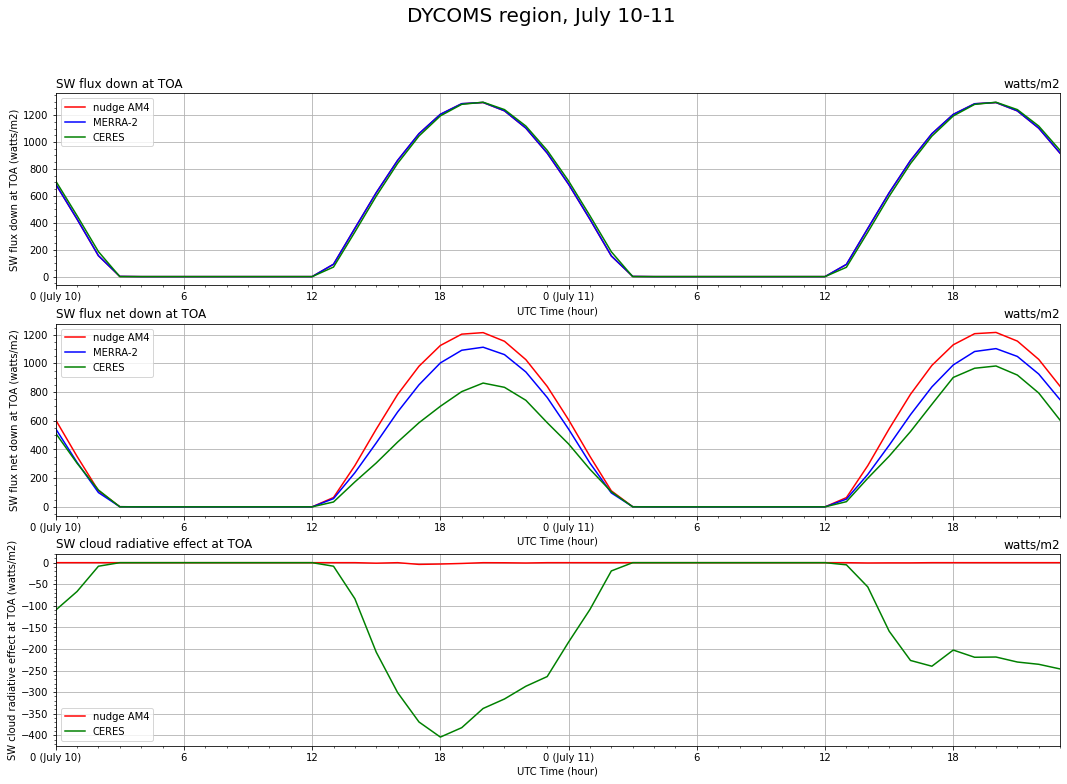

In [138]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(18, 12))
fig.suptitle("DYCOMS region, July 10-11", fontsize = 20)
#fig.tight_layout()

#--- line style
style_r1 = 'r-'; style_r2 = 'r--'; style_r3 = 'r:'
style_b1 = 'b-'; style_b2 = 'b--'; style_b3 = 'b:'
style_y1 = 'y-'; style_y2 = 'y--'; style_y3 = 'y:'
style_c1 = 'c-'; style_c2 = 'c--'; style_c2 = 'c:'
style_g1 = 'g-'; style_g2 = 'g--'; style_g3 = 'g:'

legend_0 = ["nudge AM4",
            "MERRA-2",
            "CERES"
           ]

#--- subplot 1
ax1.plot(    
    tt, swdn_am4_ijavg, style_r1, 
    tt, swdn_merra2_ijavg, style_b1,
    tt, swdn_ceres_ijavg, style_g1,
        )
var_dum = swdn_am4_ijavg.copy()
ax_def_xy(ax1, var_dum)
ax1.legend(legend_0)

#--- subplot 2
ax2.plot(    
    tt, swabs_am4_ijavg, style_r1, 
    tt, swabs_merra2_ijavg, style_b1,
    tt, swabs_ceres_ijavg, style_g1,
        )
var_dum = swabs_am4_ijavg.copy()
ax_def_xy(ax2, var_dum)
ax2.legend(legend_0)

#--- subplot 3
ax3.plot(    
    tt, swcre_am4_ijavg, style_r1, 
    tt, swcre_ceres_ijavg, style_g1,
        )
legend_3 = ["nudge AM4",
            "CERES"
           ]
var_dum = swcre_am4_ijavg.copy()
ax_def_xy(ax3, var_dum)
ax3.legend(legend_3)


## Do some statistics

In [146]:
#--- set time range
#time_range = "02_06h"
#time_range = "24_72h"
#time_range = "day1"
time_range = "day2"

dim = "time"
opt = "avg"

if (time_range == "02_06h"):
    tt1 = 4
    tt2 = 12
    
elif (time_range == "24_72h"):
    tt1 = 48
    tt2 = 144
    
elif (time_range == "day1"):
    tt1 = 0
    tt2 = 23

elif (time_range == "day2"):
    tt1 = 24
    tt2 = 47

else:
    raise ValueError("no support")

#--- var
varname1 = "SWABS"
avg_var1 = yhc.var_stats(
    swabs_am4_ijavg[tt1:tt2], 
    swabs_merra2_ijavg[tt1:tt2], 
    swabs_ceres_ijavg[tt1:tt2], 
    dim = dim, opt = opt, 
        )

print(varname1+" , "+time_range)
print(avg_var1)
print(legend_0)
    
#--- var
varname1 = "SWCRE"
avg_var1 = yhc.var_stats(
    swcre_am4_ijavg[tt1:tt2], 
    swcre_ceres_ijavg[tt1:tt2], 
    dim = dim, opt = opt, 
        )

print('')
print(varname1+" , "+time_range)
print(avg_var1)
print(legend_3)

SWABS , day2
['411.84', '360.01', '312.83']
['nudge AM4', 'MERRA-2', 'CERES']

SWCRE , day2
['-0.07', '-91.46']
['nudge AM4', 'CERES']
